In [1]:
# Importing libraries

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Data Cleaning and Preprocessing

In [4]:
df = pd.read_csv(r"C:\\Users\\nilay\\Documents\\GitHub\\StoreSalesForecasting\\stores_sales_forecasting.csv",encoding="cp1254")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [25]:
# Display the last five rows of the dataset
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [26]:
# Display the shape of the dataset
df.shape

(2121, 21)

In [27]:
print("Dataset Information:")
print(df.info())
# Display the columns of the dataset
print("\nColumns in the dataset:")
print(df.columns.tolist()) 


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   

In [28]:
# Check summary statistics for all numeric and categorical columns of the DataFrame
print("Summary Statistics:")
summary_stats = df.describe(include='all').T

# Show as a table for better readability
display(summary_stats) 
#top :  İlgili sütunda en çok ne var?  # Freq : kaç kez geçmiş - sadece sayısal sütunlarda gösterilir.

Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,2121.0,NaN,NaN,NaN,5041.643564,2885.740258,1.0,2568.0,5145.0,7534.0,9991.0
Order ID,2121,1764,US-2015-129007,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,2121,889,9/5/2016,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,2121,960,12/6/2017,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,2121,4,Standard Class,1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,2121,707,SV-20365,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,2121,707,Seth Vernon,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,2121,3,Consumer,1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,2121,1,United States,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,2121,371,New York City,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Display the data types of each column
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [30]:
#Check for numerical columns in the DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:", numeric_cols)
print("-" * 30)
print(f"Total number of numerical columns: {len(numeric_cols)}")

Numerical columns: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
------------------------------
Total number of numerical columns: 6


In [31]:
# Check for categorical columns in the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()      
print(categorical_cols)
print('-'*30)
print(f'Number of categorical Columns : {len(categorical_cols)}')

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
------------------------------
Number of categorical Columns : 15


## Missing Value Analysis


In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Duplicate Data 


In [6]:
# Count the number of duplicate rows in the dataset
df.duplicated().sum()
# Remove duplicate rows from the dataset in place
df.drop_duplicates(inplace=True)

## Unique Values in Each Column


In [7]:
df.nunique()

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64

## Removing Constant Columns

In [8]:
# Drop columns that have only one unique value
df.drop(columns=df.nunique()[df.nunique() == 1].index, inplace=True)
# Display the updated DataFrame
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-TA-10001539,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


## Drop Unnecessary Columns

In [ ]:
columns_to_drop=['Row ID','Order ID','Customer ID','Ship Date','Order Date','Product ID','Postal Code','Customer Name']
df.drop(columns=columns_to_drop, inplace=True)


,Ship Mode,Segment,City,State,Region,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Standard Class,Consumer,Fort Lauderdale,Florida,South,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,Standard Class,Consumer,Los Angeles,California,West,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,Standard Class,Consumer,Los Angeles,California,West,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...
2116,First Class,Home Office,Houston,Texas,Central,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,Second Class,Corporate,Newark,Delaware,East,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,Second Class,Consumer,Lafayette,Louisiana,South,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,Second Class,Consumer,Miami,Florida,South,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


# Exploratory Data Analysis (EDA)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

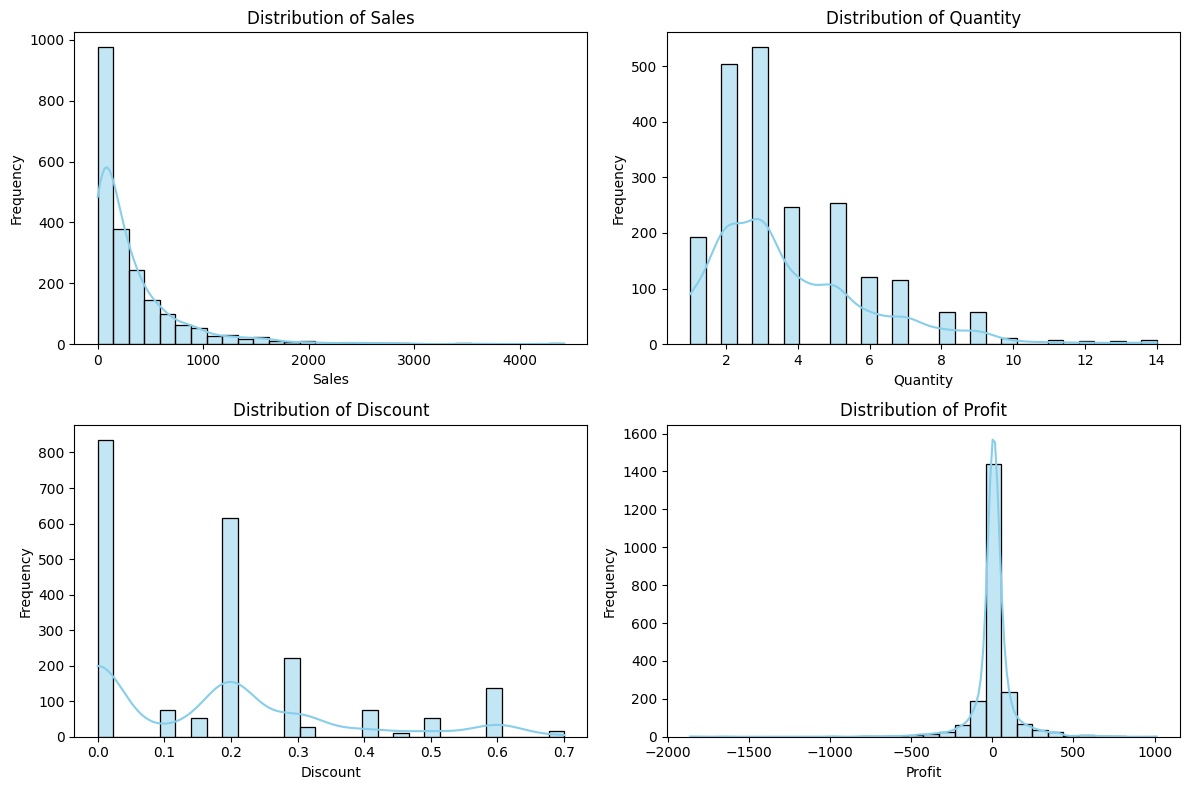

In [10]:
num_features = ['Sales', 'Quantity', 'Discount','Profit']

# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plot histograms for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation Analysis

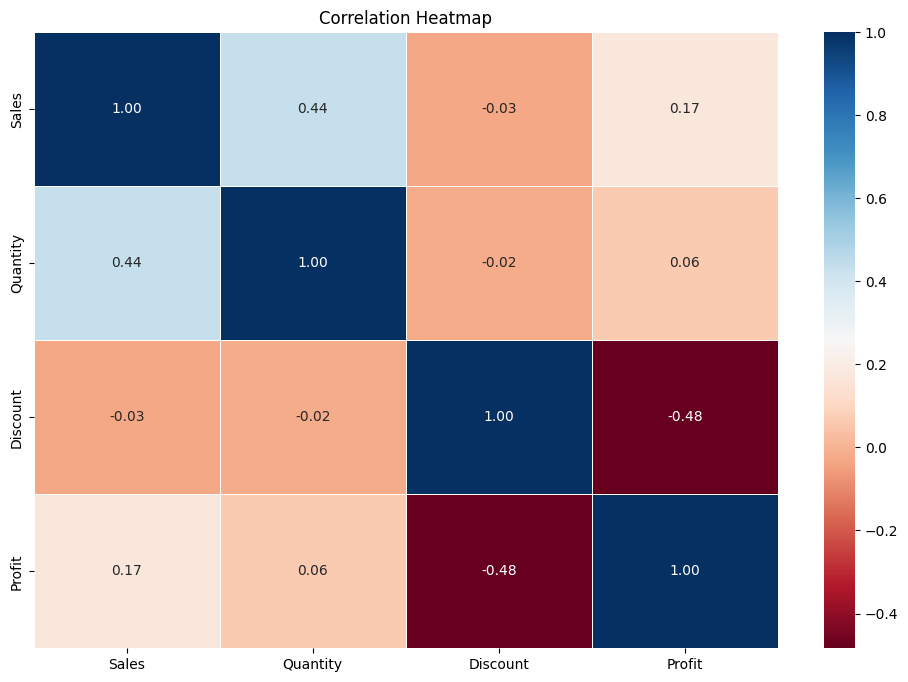

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Outlier Analysis





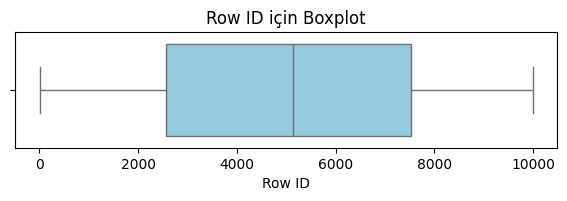

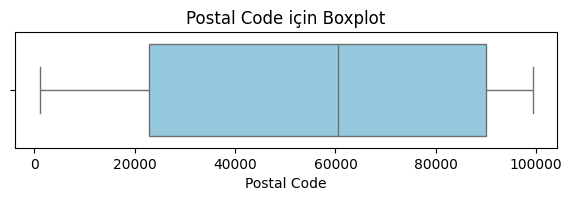

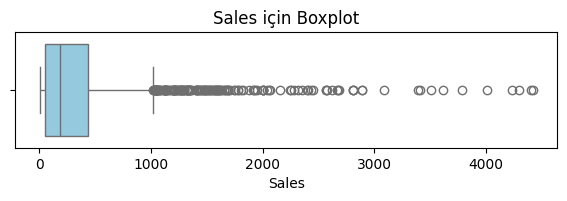

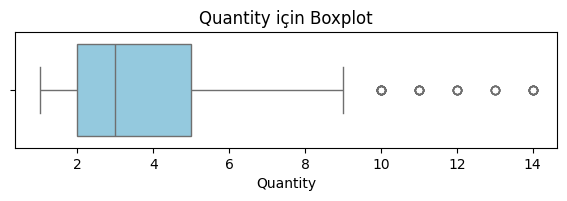

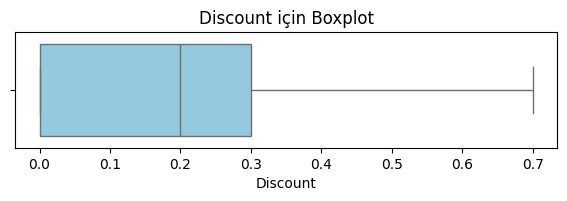

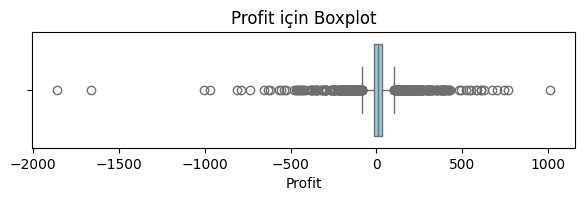

In [32]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(7, 1.5))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"{col} için Boxplot")
    plt.show()

In [6]:
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']

def outlier_count_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

print(f"{'Column':<20} {'Skewness':>9} {'Kurtosis':>9} {'Std':>9} {'OutlierCount':>14}")
print("-" * 65)
for col in numerical_features:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    std = df[col].std()
    outliers = outlier_count_iqr(df[col])
    print(f"{col:<20} {skewness:>9.2f} {kurtosis:>9.2f} {std:>9.2f} {outliers:>14}")



Column                Skewness  Kurtosis       Std   OutlierCount
-----------------------------------------------------------------
Sales                     3.35     15.92    503.18            164
Quantity                  1.35      2.22      2.25             39
Discount                  0.94      0.22      0.18              0
Profit                   -2.29     37.00    136.05            407


In [14]:
from scipy.stats.mstats import winsorize

for feature in num_features:
    df[feature] = winsorize(df[feature], limits=[0.05, 0.05])  # Cap 5% on both sides
    print(f"Outliers capped for {feature}")

Outliers capped for Sales
Outliers capped for Quantity
Outliers capped for Discount
Outliers capped for Profit


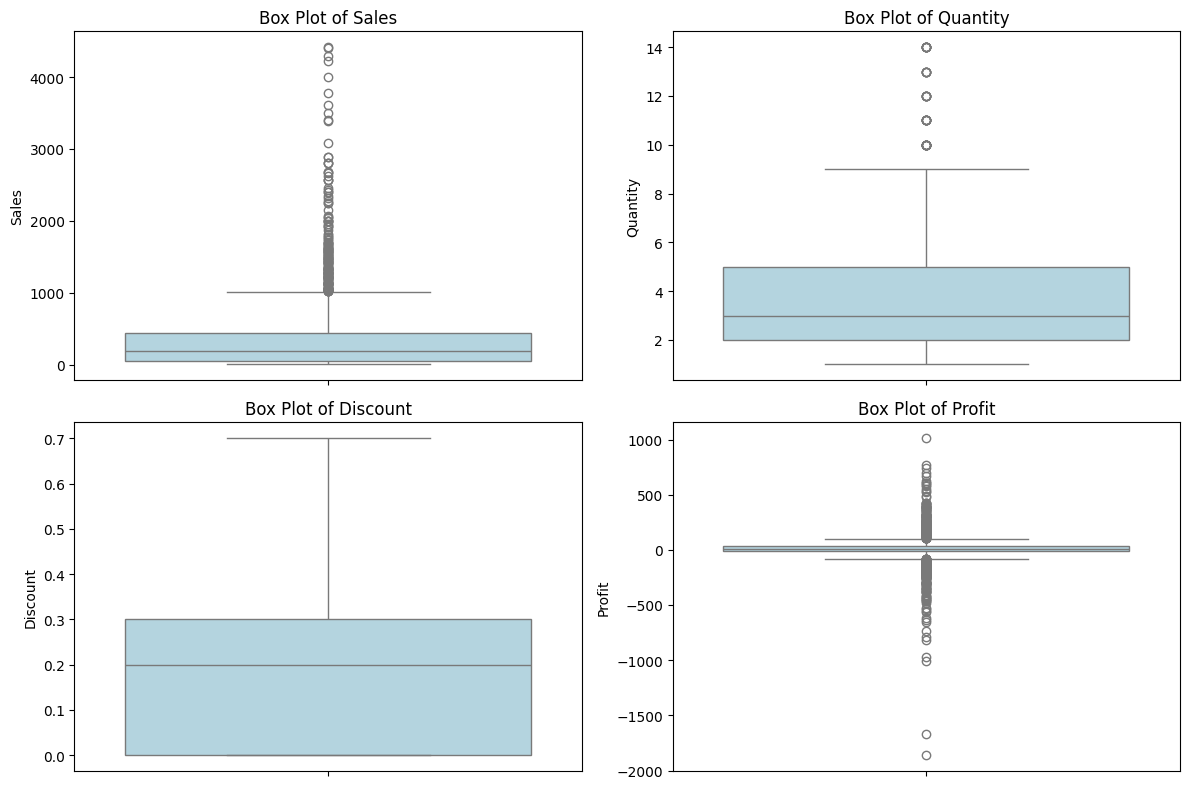

In [9]:
# List of numerical features
num_features = ['Sales', 'Quantity', 'Discount', 'Profit']

# Set up the plotting area
plt.figure(figsize=(12, 8))

# Plot simple box plots for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis on Categorical Features



Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64


C:\Users\nilay\AppData\Local\Temp\ipykernel_29372\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


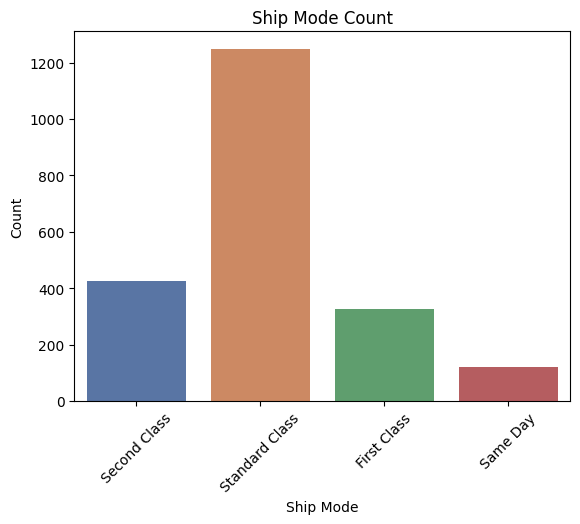

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64


C:\Users\nilay\AppData\Local\Temp\ipykernel_29372\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


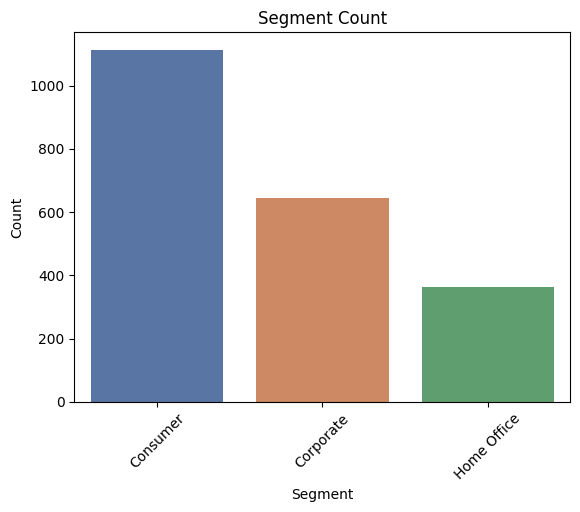

Region
West       707
East       601
Central    481
South      332
Name: count, dtype: int64


C:\Users\nilay\AppData\Local\Temp\ipykernel_29372\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


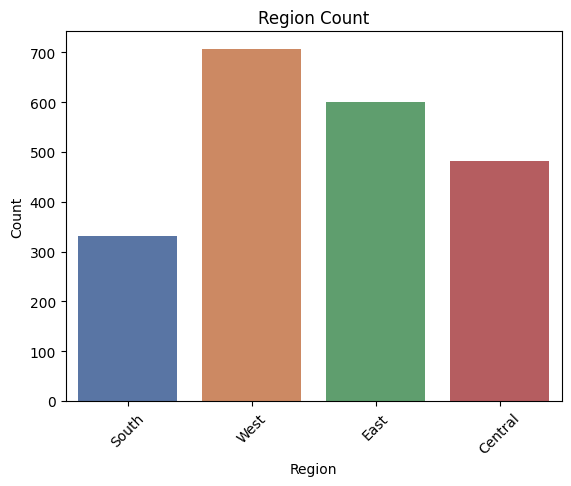

Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64


C:\Users\nilay\AppData\Local\Temp\ipykernel_29372\1477392013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'


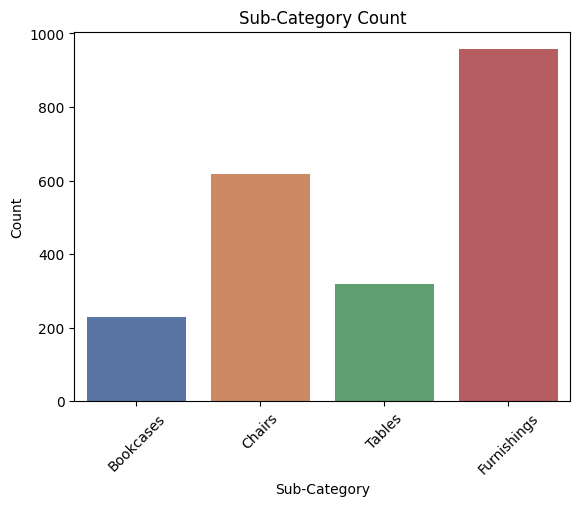

In [10]:
# Categorical features
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']

for feature in categorical_features:
    print(df[feature].value_counts())
    sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'
    plt.title(f'{feature} Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

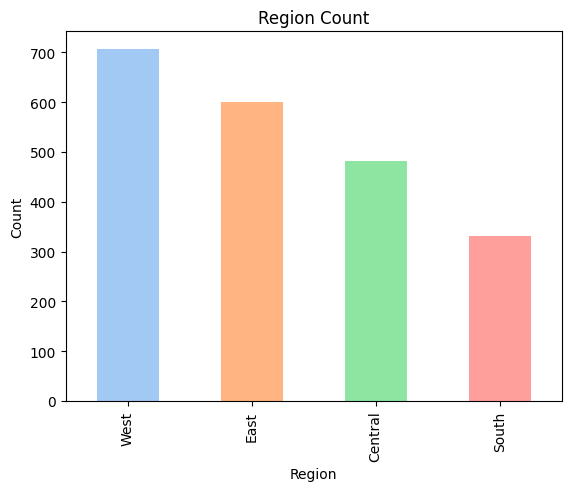

In [11]:
colors = sns.color_palette('pastel')

# Plot the bar chart with custom colors
df.Region.value_counts().plot(kind="bar", color=colors)

# Add titles and labels for clarity (optional)
plt.title("Region Count")
plt.xlabel("Region")
plt.ylabel("Count")

# Display the plot
plt.show()

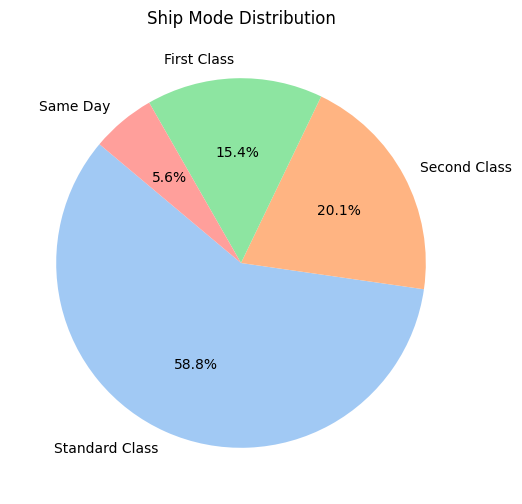

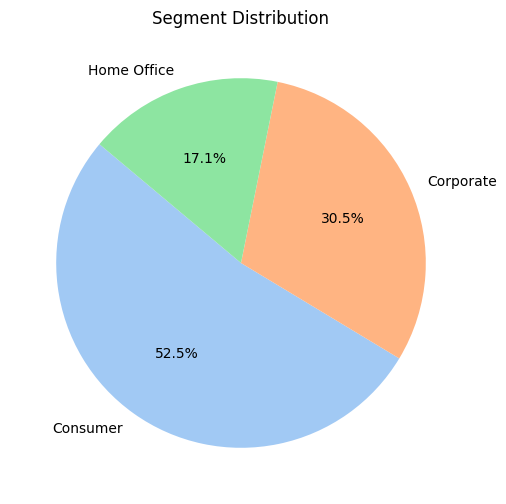

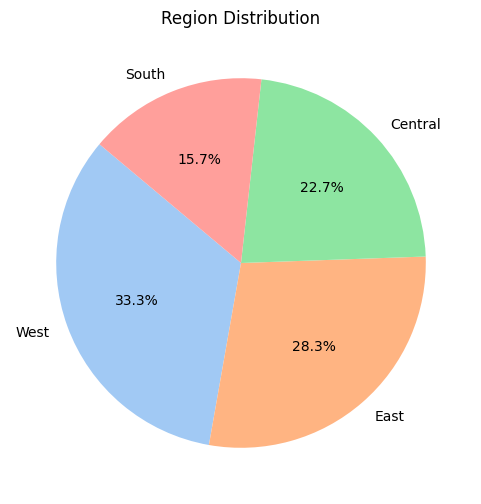

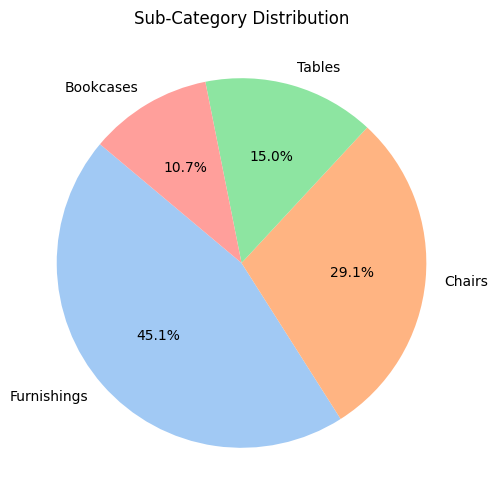

In [12]:
# Categorical features
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']

for feature in categorical_features:
    # Get value counts
    counts = df[feature].value_counts()

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'{feature} Distribution')

    plt.show()

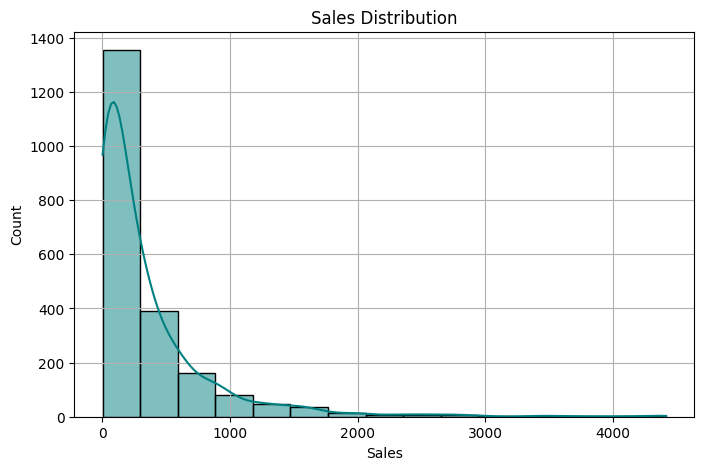

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=15, kde=True, color='teal')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.grid(True)
plt.show()


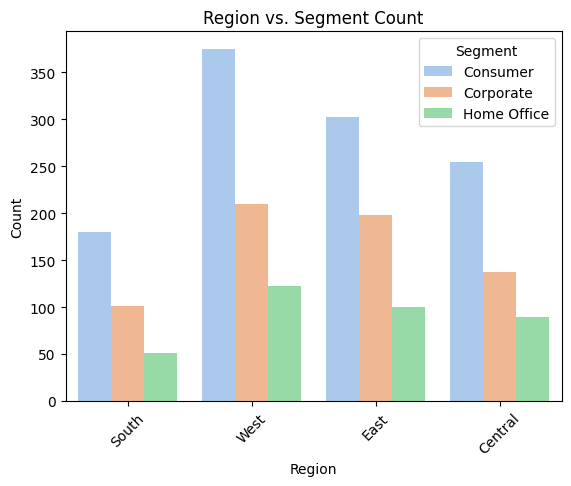

In [14]:
sns.countplot(x='Region', hue='Segment', data=df, palette='pastel')
plt.title("Region vs. Segment Count")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\nilay\AppData\Local\Temp\ipykernel_29372\1806179435.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')


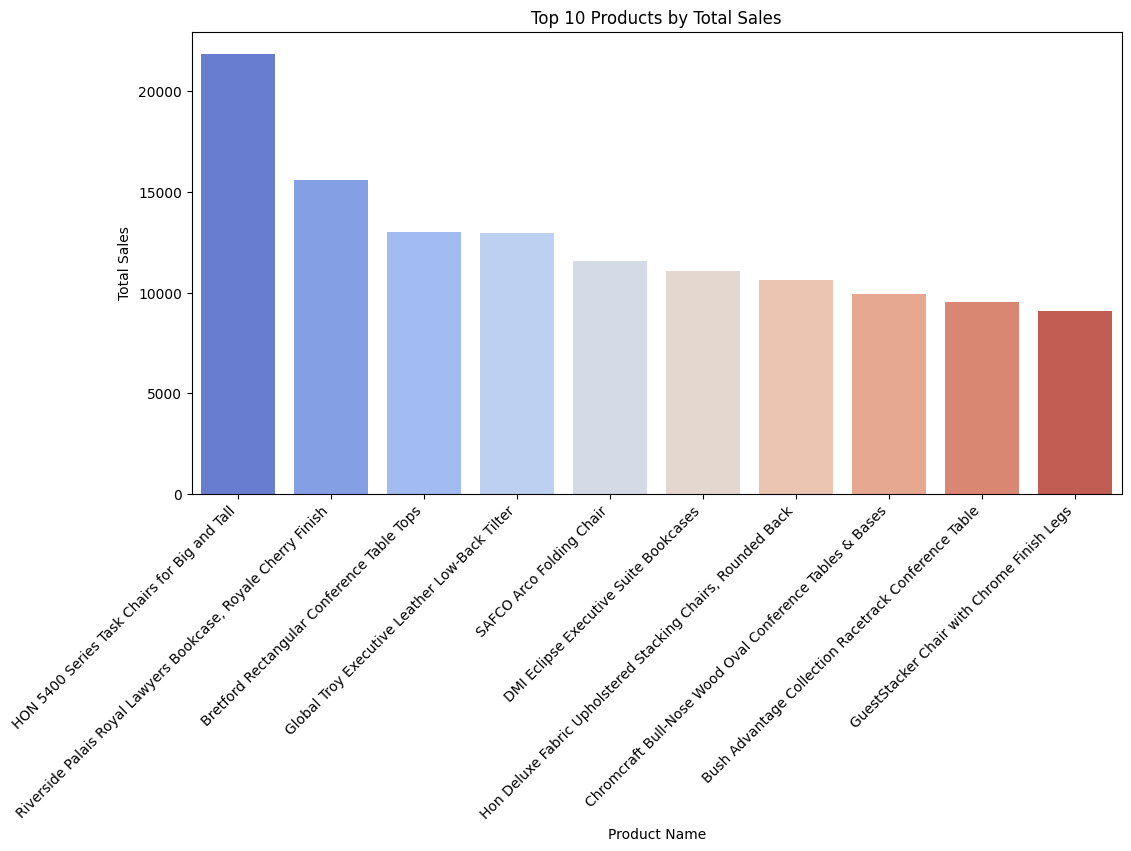

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort products by total sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\nilay\AppData\Local\Temp\ipykernel_29372\3892576844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=df, palette='coolwarm', estimator=sum)


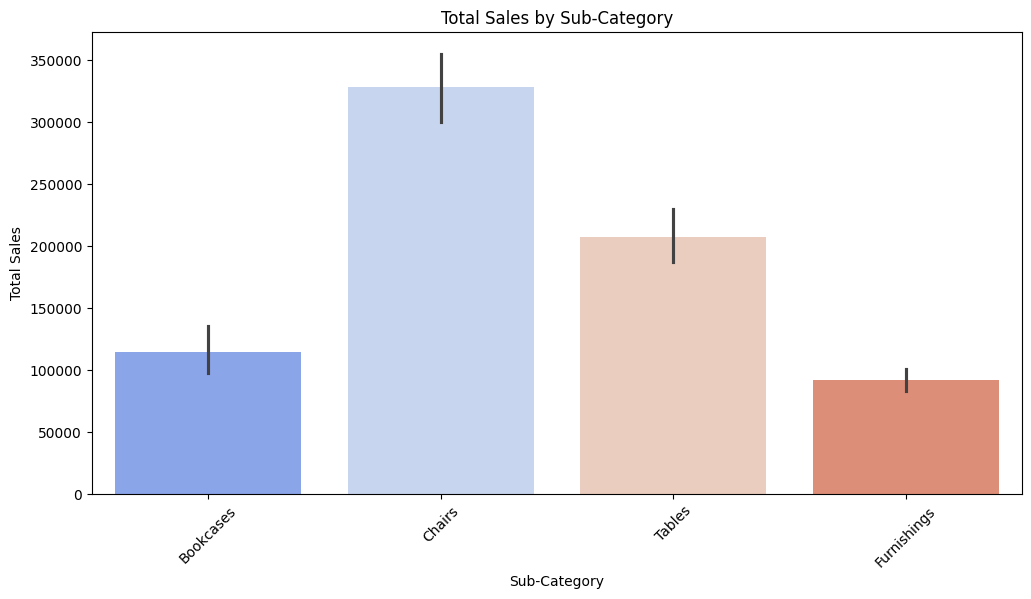

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=df, palette='coolwarm', estimator=sum)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


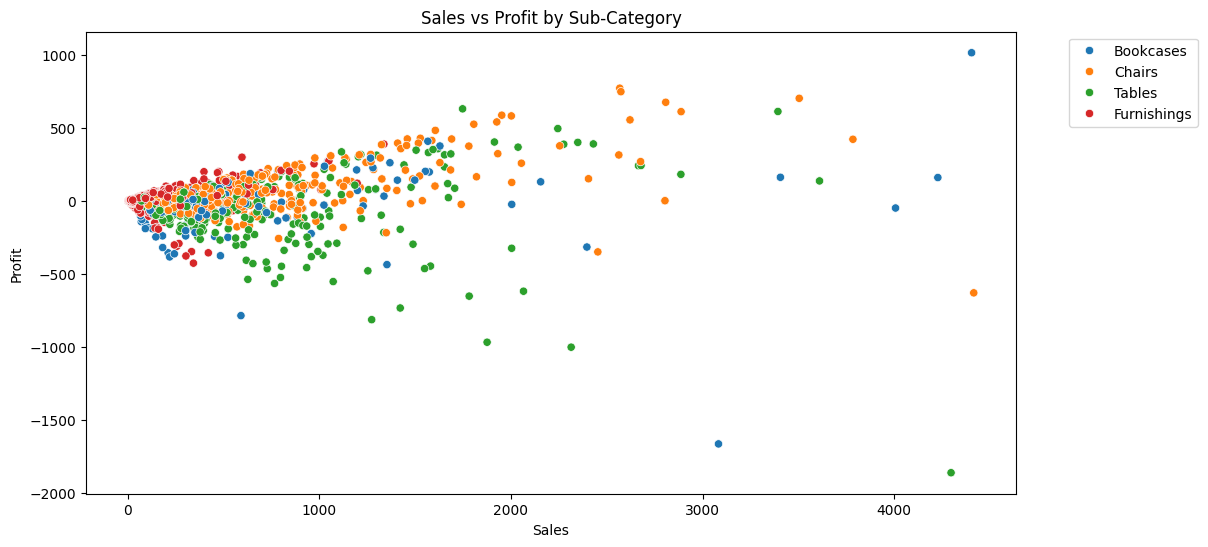

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Sub-Category', palette='tab10')
plt.title('Sales vs Profit by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
region1 = "East"
region2 = "West"
region3 = "South"
region4 = "Central"


sales_region1 = df[df["Region"] == region1]["Sales"]
sales_region2 = df[df["Region"] == region2]["Sales"]
sales_region3 = df[df["Region"] == region3]["Sales"]
sales_region4 = df[df["Region"] == region4]["Sales"]

f_stat, p_value = stats.f_oneway(sales_region1, sales_region2, sales_region3, sales_region4)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between the regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between the regions.")


F-statistic: 0.1202
P-value: 0.9482
Fail to reject the null hypothesis: No significant difference in sales between the regions.


In [20]:
corr, p_value = stats.pearsonr(df["Discount"], df["Sales"])


print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between discount and sales.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between discount and sales.")

Pearson Correlation Coefficient: -0.0286
P-value: 0.1883
Fail to reject the null hypothesis: No significant correlation between discount and sales.


In [21]:
consumer_sales = df[df["Segment"] == "Consumer"]["Sales"]
corporate_sales = df[df["Segment"] == "Corporate"]["Sales"]
home_office_sales = df[df["Segment"] == "Home Office"]["Sales"]

f_stat, p_value = stats.f_oneway(consumer_sales, corporate_sales, home_office_sales)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one segment has significantly different sales.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales among segments.")

F-statistic: 0.1539
P-value: 0.8574
Fail to reject the null hypothesis: No significant difference in sales among segments.


In [22]:
cities = df['City'].unique()


sales_data = [df[df["City"] == city]["Sales"] for city in cities]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between cities.")

F-statistic: 0.9434
P-value: 0.7574
Fail to reject the null hypothesis: No significant difference in sales between cities.


In [31]:
cities = df['City'].unique()


sales_data = [df[df["City"] == city]["Sales"] for city in cities]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between cities.")

F-statistic: 1.0551
P-value: 0.2471
Fail to reject the null hypothesis: No significant difference in sales between cities.


In [32]:
ship_mode1 = "Standard Class"
ship_mode2 = "Second Class"
ship_mode3 = "First Class"
ship_mode4 = "Same Day"

sales_mode1 = df[df["Ship Mode"] == ship_mode1]["Sales"]
sales_mode2 = df[df["Ship Mode"] == ship_mode2]["Sales"]
sales_mode3 = df[df["Ship Mode"] == ship_mode3]["Sales"]
sales_mode4 = df[df["Ship Mode"] == ship_mode4]["Sales"]

t_stat, p_value = stats.ttest_ind(sales_mode1, sales_mode2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant difference in sales between {ship_mode1} and {ship_mode2}.")
else:
    print(f"Fail to reject the null hypothesis: No significant difference in sales between {ship_mode1} and {ship_mode2}.")

T-statistic: 0.0289
P-value: 0.9769
Fail to reject the null hypothesis: No significant difference in sales between Standard Class and Second Class.


In [33]:
states = df['State'].unique()


sales_data = [df[df["State"] == state]["Sales"] for state in states]

f_stat, p_value = stats.f_oneway(*sales_data)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales between states.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between states.")

F-statistic: 1.7940
P-value: 0.0008
Reject the null hypothesis: There is a significant difference in sales between states.


## Modeling


Model 1: LinearRegression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y = df['Sales']
X = df.drop(['Sales', 'Product Name'], axis=1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Linear Regression Performance:")
print("R^2 score:", f"{score:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Linear Regression Performance:
R^2 score: -11227368878963.09%
MAE: 73940389.20
MSE: 34402922541388128.00
RMSE: 185480248.39


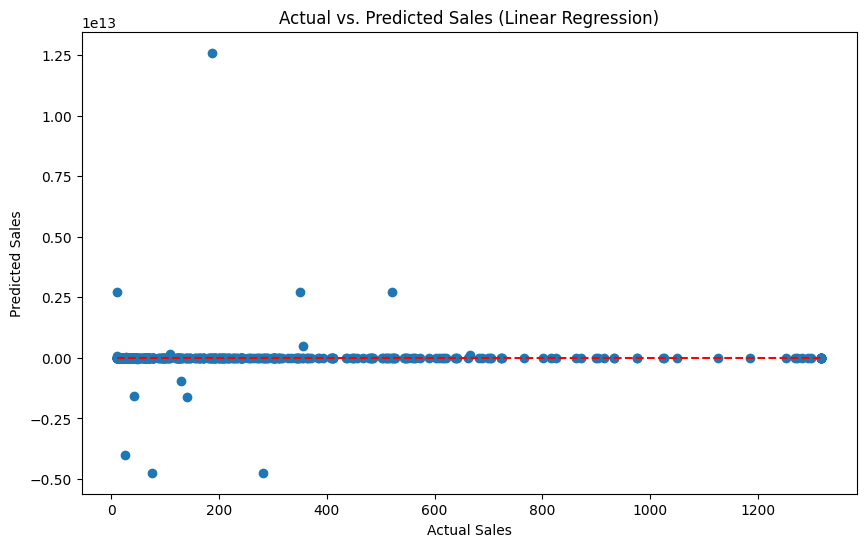

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()

Model 2: RandomForestRegressor

Random Forest Regression Performance:
R² Score: 71.48%
MAE: 105.94
MSE: 87390.84
RMSE: 295.62


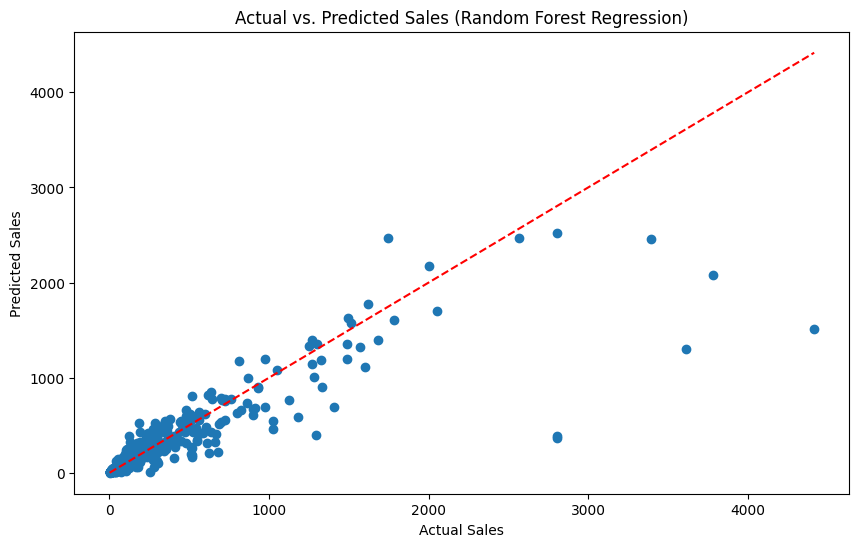

In [24]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Random Forest Regression Performance:")
print(f"R² Score: {r2:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Random Forest Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

Model 3:DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(" Decision Tree Regression Performance:")
print(f"R² Score: {r2:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")




 Decision Tree Regression Performance:
R² Score: 75.64%
MAE: 104.32
MSE: 31461.39
RMSE: 177.37


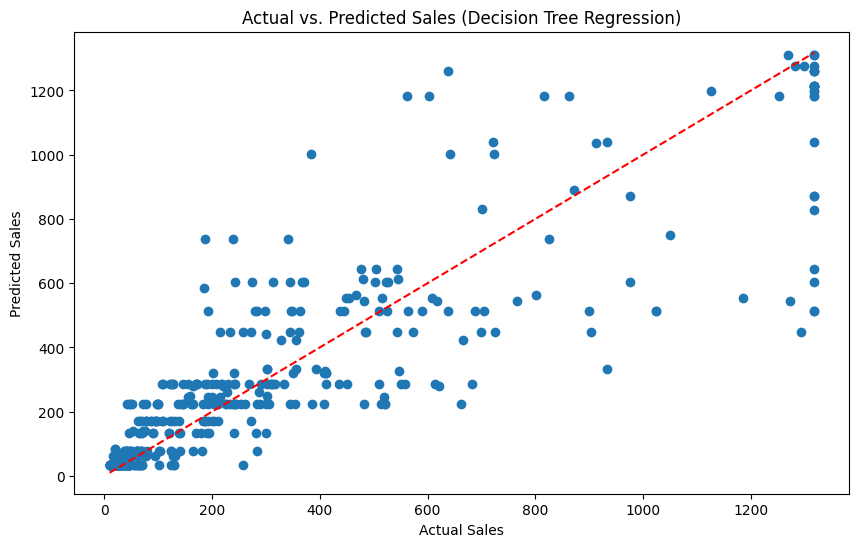

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Decision Tree Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


Model 4 : GradientBoostingRegressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

r2 = r2_score(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)

print("Gradient Boosting Regression Performance:")
print(f"R² Score: {r2:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Gradient Boosting Regression Performance:
R² Score: 81.32%
MAE: 95.18
MSE: 24122.98
RMSE: 155.32


Model 5 : XGBRegressor

In [43]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print("XGBoost Regression Performance:")
print(f"R² Score: {r2:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

XGBoost Regression Performance:
R² Score: 80.13%
MAE: 96.12
MSE: 25654.97
RMSE: 160.17


Model 6 : DecisionTreeRegressor

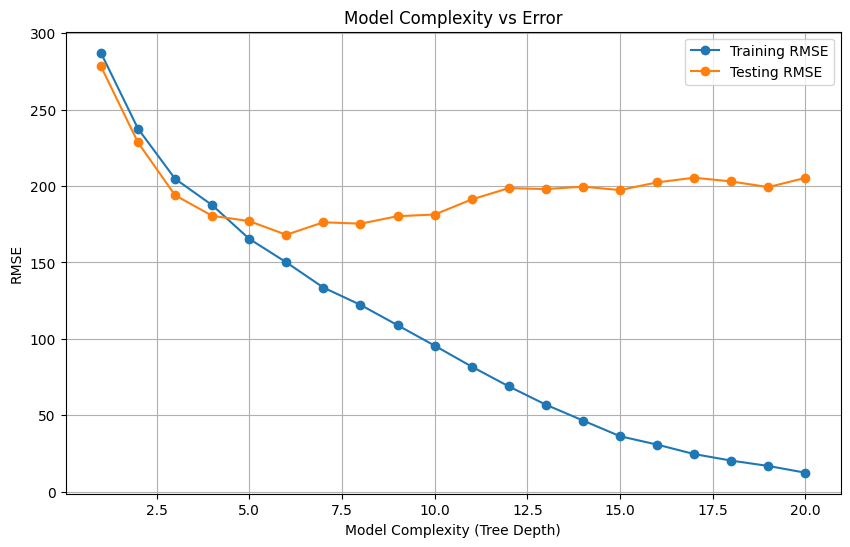

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


train_errors = []
test_errors = []
depths = range(1, 21)

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)


plt.figure(figsize=(10,6))
plt.plot(depths, train_errors, label="Training RMSE", marker='o')
plt.plot(depths, test_errors, label="Testing RMSE", marker='o')
plt.xlabel("Model Complexity (Tree Depth)")
plt.ylabel("RMSE")
plt.title("Model Complexity vs Error")
plt.legend()
plt.grid(True)
plt.show()

# Regularization

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 68282.19263978142
R² Score: 0.47126730477378465


In [ ]:
from sklearn.ensemble import VotingRegressor
models=[('gbr', gbr_model),('rfr', rf_model),('xgb', xgb_model)]
voting_reg = VotingRegressor(estimators=models)
voting_reg.fit(X_train, y_train)
y_pred_voting = voting_reg.predict(X_test)

print("Voting Regressor Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_voting):.2%}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_voting)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_voting):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_voting):.2f}")

Voting Regressor Performance:
R² Score: 81.73%
RMSE: 153.61
MAE: 89.99
MSE: 23597.46


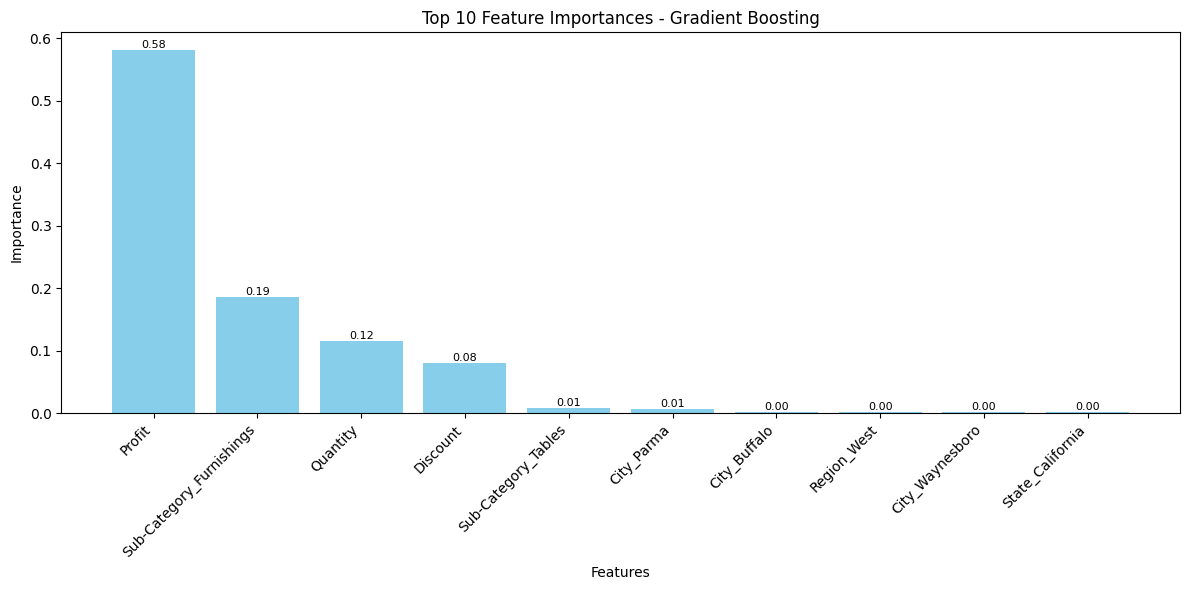

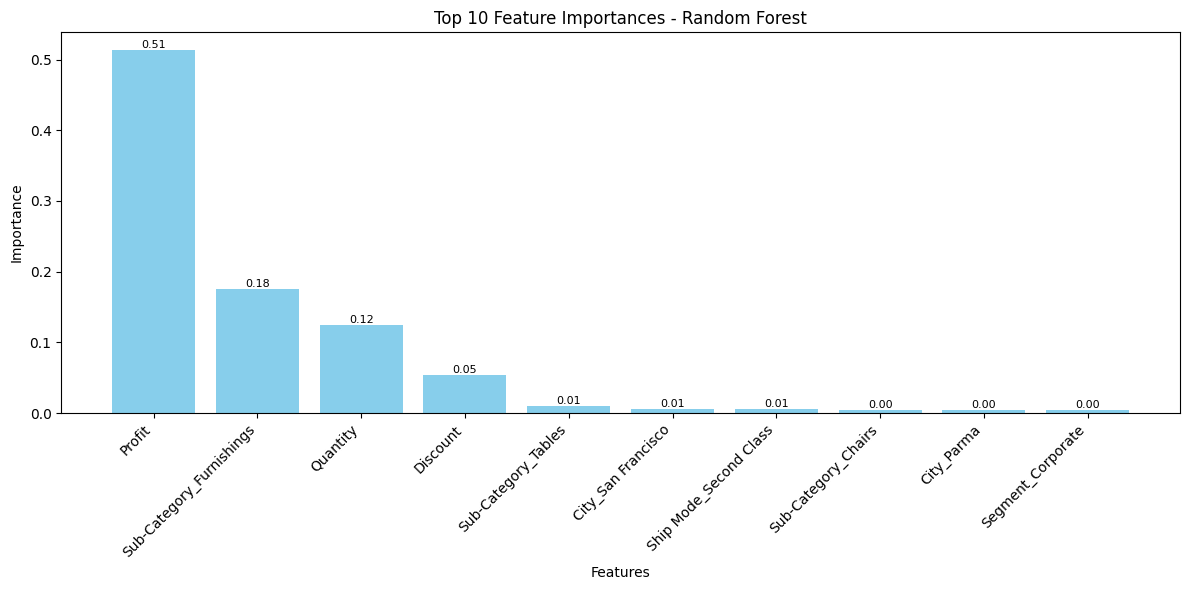

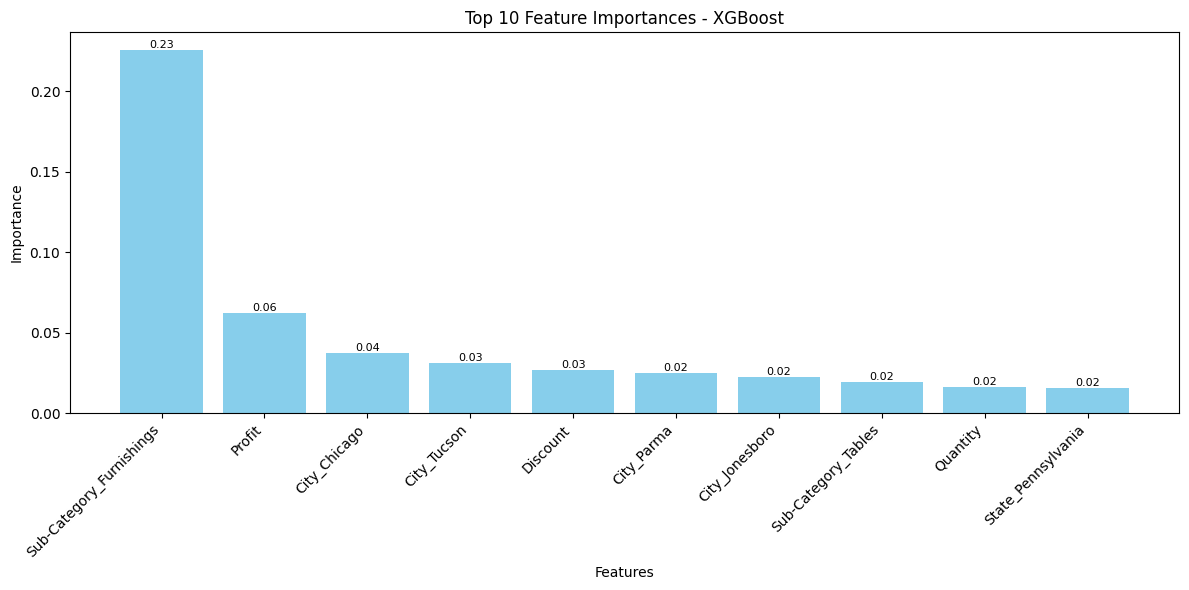

In [52]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

models = [('Gradient Boosting', gbr_model),
          ('Random Forest', rf_model),
           ('XGBoost', xgb_model)
         ]

# Loop through each model and plot feature importances
for model_name, model in models:
    # Get feature importances
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    top_n = 10
    top_indices = indices[:top_n]
    top_features = X.columns[top_indices]
    top_importances = importances[top_indices]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.title(f"Top {top_n} Feature Importances - {model_name}")
    bars = plt.bar(range(top_n), top_importances, color='skyblue')
    plt.xticks(range(top_n), top_features, rotation=45, ha='right')
    plt.xlabel("Features")
    plt.ylabel("Importance")

    for bar, imp in zip(bars, top_importances):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{imp:.2f}",
                 ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()
